In [1]:
import sys
sys.path.append("../")

In [2]:
import cv2
import torch
import random
import numpy as np
from src.io.io import read_rgb
import matplotlib.pyplot as plt
from src.transform.transform import transform
from src.dataset.road_dataset import RoadDataset
from src.model.segmentation_module import RoadSegmentationModule

/Users/riccardomusmeci/progetti/github/smart-arrotino/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/riccardomusmeci/progetti/github/smart-arrotino/venv/lib/python3.9/site-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  rank_zero_deprecation(


In [9]:
def visualize(image: np.array, gt_mask: np.array, mask: np.array, category: list, ):
    """plots images in one row
    """
    
    plt.figure(figsize=(32, 9))
    plt.subplot(1, 3, 1)
    plt.title(f"Grount Truth Image + Mask")
    color = np.array([20, 250, 10], dtype=np.uint8)
    masked_img = np.where(gt_mask[..., None], color, image)
    gt_image = cv2.addWeighted(image, 0.5, masked_img, 0.5, 0)
    
    plt.imshow(gt_image)
    
    plt.subplot(1, 3, 2)
    plt.title(f"Pred Mask for {category}")
    # mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    # masked_img = np.where(mask[...,None], color, img)
    color = np.array([20, 250, 10], dtype=np.uint8)
    masked_img = np.where(mask[..., None], color, image)
    pred_image = cv2.addWeighted(image, 0.5, masked_img, 0.5, 0)
    
    plt.imshow(pred_image)
    plt.show()

In [4]:
model = RoadSegmentationModule.load_from_checkpoint(
    checkpoint_path="PATH/TO/BEST/CKPT"
)
model.model.eval();

In [5]:
input_size = (512, 512)
dataset = RoadDataset(
    data_dir="PATH/TO/SPLIT/DATASET",
    classes=["CLASS"],
    train=False,
    transform=transform(train=False, input_size=input_size)
)

/Users/riccardomusmeci/progetti/github/dataset/road-segmentation/Dataset/val/1091927_DF_251_251BDF0490_01185/1091927_DF_251_251BDF0490_01185


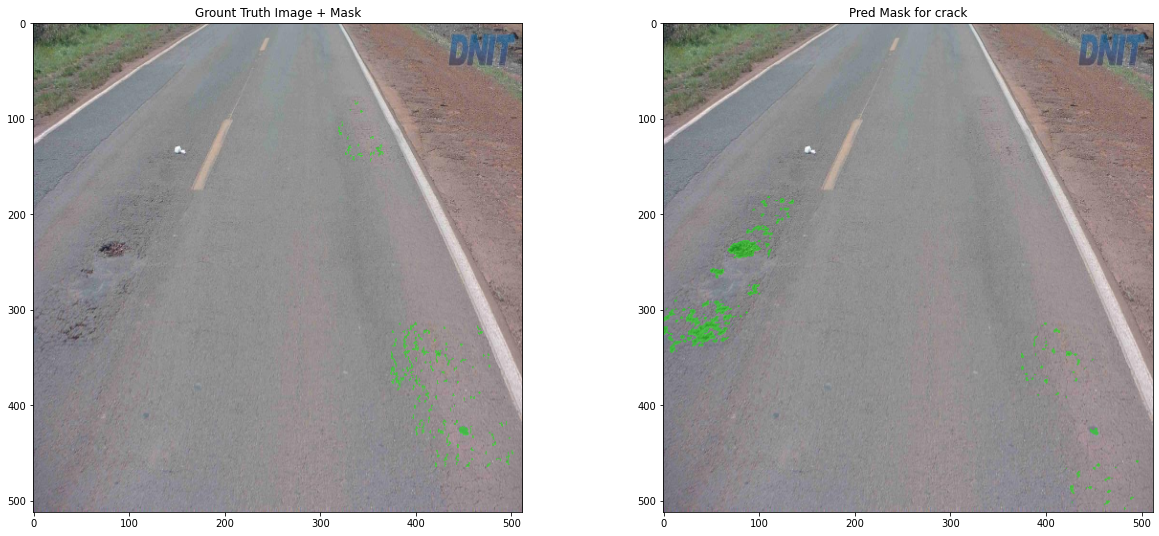

In [18]:
index = random.randint(0, len(dataset)-1)
img_path = dataset.images[index]
print(img_path)
x, mask = dataset[index]

preds = model(x.unsqueeze(0))
preds = torch.sigmoid(preds)

pred_mask = preds.squeeze().squeeze().detach().numpy()

pred_mask[pred_mask>0.5] = 1
pred_mask[pred_mask<=0.5] = 0

image = read_rgb(file_path=img_path + "_RAW.jpg")
image = cv2.resize(image, input_size)

visualize(
    image=image,
    gt_mask=mask.detach().numpy().squeeze(),
    mask=pred_mask,
    category="crack"
)